In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DL Lab/Lab5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
Cloning into 'mmdetection'...
remote: Enumerating objects: 24281, done.
remote: Total 24281 (delta 0), reused 0 (delta 0), pack-reused 24281
Receiving objects: 100% (24281/24281), 37.44 MiB | 2.05 MiB/s, done.
Resolving deltas: 100% (16998/16998), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Running setup.py develop for mmdet


In [ ]:
from mmcv import collect_env
collect_env()

{'CUDA available': True,
 'CUDA_HOME': '/usr/local/cuda',
 'GCC': 'gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0',
 'GPU 0': 'Tesla P100-PCIE-16GB',
 'MMCV': '1.4.8',
 'MMCV CUDA Compiler': '11.1',
 'MMCV Compiler': 'GCC 7.3',
 'NVCC': 'Build cuda_11.1.TC455_06.29190527_0',
 'OpenCV': '4.1.2',
 'PyTorch': '1.9.0+cu111',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.1\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86,code=sm_86

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
2.23.0
11.1
GCC 7.3


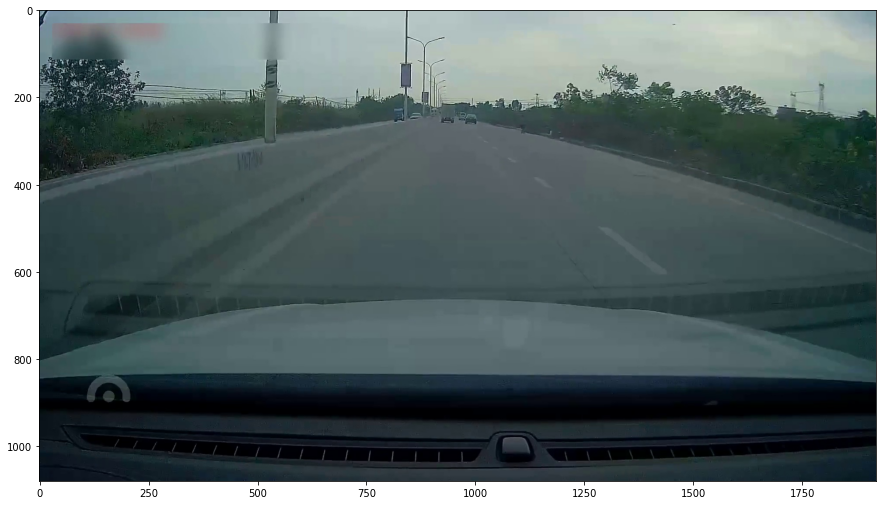

In [ ]:
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/drive/MyDrive/Colab Notebooks/DL Lab/Lab5/code/data/D2-City/train/6407.jpg')
plt.figure(figsize=(15,10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### Faster-RCNN

In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/code/faster_rcnn_r50_fpn_1x_didi.py /content/mmdetection/configs/faster_rcnn/
!cp /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/code/didi_detection.py /content/mmdetection/configs/_base_/datasets

In [ ]:
!python /content/mmdetection/tools/train.py /content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_didi.py

/usr/local/lib/python3.7/dist-packages/mmdet-2.23.0-py3.7.egg/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/usr/local/lib/python3.7/dist-packages/mmdet-2.23.0-py3.7.egg/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
fatal: not a git repository (or any of the parent directories): .git
2022-04-12 22:11:01,824 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Mar 

In [ ]:
# convert test data to coco format
!python /content/mmdetection/tools/dataset_converters/images2coco.py \
    /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/code/data/D2-City/test \
    /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/code/data/D2-City/classes.txt \
    /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/code/data/D2-City/test.json

[>>] 1000/1000, 70.3 task/s, elapsed: 14s, ETA:     0s
save json file: /content/drive/MyDrive/Colab Notebooks/DL Lab/Lab5/code/data/D2-City/test.json


In [ ]:
!python /content/mmdetection/tools/test.py \
    /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/mmdetection/work_dirs/faster_rcnn_r50_fpn_1x_didi/faster_rcnn_r50_fpn_1x_didi.py \
    /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/mmdetection/work_dirs/faster_rcnn_r50_fpn_1x_didi/latest.pth \
    --format-only \
    --options "jsonfile_prefix=./test_results"

/content/mmdetection/tools/test.py:115: UserWarning: --options is deprecated in favor of --eval-options
  warnings.warn('--options is deprecated in favor of --eval-options')
/content/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load checkpoint from local path: /content/drive/MyDrive/Colab N

#### change anchor box settings

In [6]:
!cp /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/code/faster_rcnn_r50_fpn_customized_anchor.py /content/mmdetection/configs/faster_rcnn/
!cp /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/code/didi_detection.py /content/mmdetection/configs/_base_/datasets

In [ ]:
!python /content/mmdetection/tools/train.py /content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_customized_anchor.py

/content/mmdetection/mmdet/utils/setup_env.py:39: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmdetection/mmdet/utils/setup_env.py:49: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-04-28 09:56:33,945 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla P100-PCIE-16GB
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.1, 

In [ ]:
!cp -r /content/mmdetection/work_dirs/faster_rcnn_r50_fpn_customized_anchor /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/mmdetection/work_dirs/

##### use k-means to analyze the distribution of anchor boxes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

annotation{
"id": int, "image_id": int, "category_id": int, "segmentation": RLE or [polygon], "area": float, "bbox": [x,y,width,height], "iscrowd": 0 or 1,
}


In [ ]:
f = open('/content/drive/MyDrive/Colab Notebooks/DL Lab/Lab5/code/data/D2-City/train.json', 'r')
train_set = json.load(f)
f.close()
train_annotations = train_set['annotations']
train_images = train_set['images']

In [ ]:
hs, ws, image_ids, areas, bboxes, category_ids, ids, iscrowds = [],[],[],[],[],[],[],[]
for image in train_images:
  hs.append(image['height'])
  ws.append(image['width'])
  image_ids.append(image['id'])

image_ids2, hs2, ws2 = [], [], []
for anno in train_annotations:
    areas.append(anno['area'])
    bboxes.append(np.array(anno['bbox']))
    category_ids.append(anno['category_id'])
    ids.append(anno['id'])
    image_ids2.append(anno['image_id'])
    hs2.append(hs[image_ids.index(anno['image_id'])])
    ws2.append(ws[image_ids.index(anno['image_id'])])
    iscrowds.append(anno['iscrowd'])

In [ ]:
d = {'image_id': image_ids2, 'height': hs2, 'width': ws2, 'area': areas, 'bbox': bboxes , 'category_id': category_ids, 'id': ids, 'iscrowd': iscrowds}
train_df = pd.DataFrame(data=d)
train_df.head(10)

,image_id,height,width,area,bbox,category_id,id,iscrowd
0,0,1080,1920,63435.47,"[893.6, 495.87, 270.71, 234.33]",1,0,0
1,0,1080,1920,12390.11,"[1163.11, 516.5, 105.09, 117.9]",1,1,0
2,0,1080,1920,4940.18,"[1245.04, 528.6, 73.69, 67.04]",1,2,0
3,0,1080,1920,107498.82,"[1349.8, 492.3, 442.2, 243.1]",1,3,0
4,1,1080,1920,73998.22,"[8.76, 576.8, 378.14, 195.69]",1,4,0
5,1,1080,1920,71833.73,"[882.09, 494.47, 286.27, 250.93]",1,5,0
6,1,1080,1920,10260.52,"[1133.91, 523.81, 95.83, 107.07]",1,6,0
7,1,1080,1920,88890.74,"[1313.53, 494.48, 389.24, 228.37]",1,7,0
8,2,1080,1920,47473.40,"[863.22, 507.85, 235.6, 201.5]",1,8,0
9,2,1080,1920,7328.38,"[1081.24, 525.0, 87.66, 83.6]",1,9,0


In [ ]:
import copy
def _resize(old_image_scale, new_image_scale, df):
    b_xs, b_ys, b_ws, b_hs = [], [], [], []
    old_w, old_h = old_image_scale
    new_w, new_h = new_image_scale
    h_scale = new_h/old_h
    w_scale = new_w/old_w
    scale_factor = np.array([w_scale, h_scale, w_scale, h_scale], dtype=np.float32)
    for i, bbox in enumerate(df['bbox']):
        bbox = bbox *scale_factor
        bbox[0::2] = np.clip(bbox[0::2], 0, new_image_scale[1])
        bbox[1::2] = np.clip(bbox[1::2], 0, new_image_scale[0])
        b_xs.append(bbox[0])
        b_ys.append(bbox[1])
        b_ws.append(bbox[2])
        b_hs.append(bbox[3])

    bboxes = { 'b_x': b_xs, 'b_y': b_ys, 'b_w': b_ws, 'b_h': b_hs}
    return pd.DataFrame(data=bboxes)

bboxes = _resize((1920, 1080), (1333, 800), train_df)

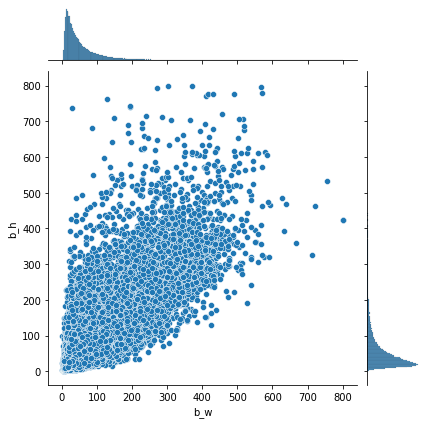

In [ ]:
sns.jointplot(x="b_w", y="b_h", data=bboxes)

 > In class AnchorGenerator:    
       base_sizes (list[int] | None): 
       The basic sizes of anchors in multiple levels.
            If None is given, strides will be used as base_sizes.
            (If strides are non square, the shortest stride is taken.)

In [ ]:
bboxes['b_ar'] = bboxes['b_w']/bboxes['b_h']
bboxes.describe()
# I'm not sure if the computation is correct coz the max size is unexpectedly large and the min is unexpectedly small

,b_x,b_y,b_w,b_h,b_ar
count,82410.000000,82410.000000,82410.000000,82410.000000,82410.000000
mean,513.751553,262.356157,62.217984,59.659153,1.116481
std,235.794438,115.106265,68.612861,66.063506,0.575181
min,0.000000,0.000000,0.416563,2.029630,0.013663
25%,365.110097,162.355550,19.509011,21.985184,0.769718
50%,547.231226,255.333325,37.903717,38.022221,1.088908
75%,716.980449,366.974062,76.640559,69.888887,1.335927
max,800.000000,645.903683,800.000000,799.999974,9.885334


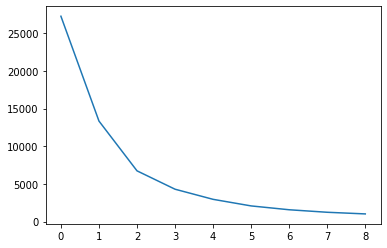

In [ ]:
# aspect ratios
from sklearn.cluster import KMeans

aspect_ratios = bboxes['b_ar'].values
aspect_ratios = aspect_ratios.reshape(-1,1)

loss = []
for i in range(1, 10):
  kmeans = KMeans(i, random_state=1)
  labels = kmeans.fit(aspect_ratios)
  loss.append(labels.inertia_)

plt.plot(loss)

In [ ]:
kmeans = KMeans(5, random_state=1)
labels = kmeans.fit(aspect_ratios)
print("Aspect Ratios:")
print(labels.cluster_centers_)

Aspect Ratios:
[[0.48975989]
 [1.4822957 ]
 [1.04217371]
 [2.3119141 ]
 [4.00007993]]


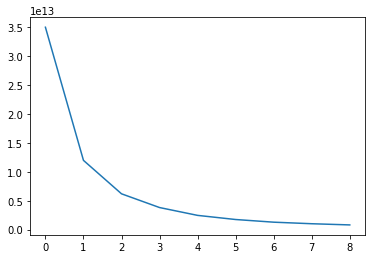

In [ ]:
# area scales
bboxes['area'] = bboxes['b_w']*bboxes['b_h']
area_scales = bboxes['area'].values
area_scales = area_scales.reshape(-1,1)

loss = []
for i in range(1, 10):
  kmeans = KMeans(i, random_state=1)
  labels = kmeans.fit(area_scales)
  loss.append(labels.inertia_)

plt.plot(loss)

In [ ]:
kmeans = KMeans(5, random_state=1)
labels = kmeans.fit(area_scales)
print("Area scales:")
print(labels.cluster_centers_)

Area scales:
[[  2162.3073158 ]
 [128175.66832397]
 [ 22592.35528279]
 [250329.24201872]
 [ 62498.08800189]]


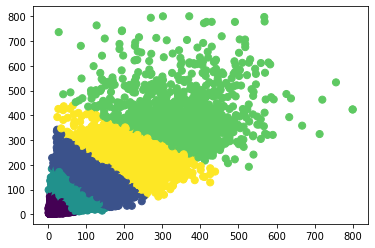

In [ ]:
# width and height
w_h = np.stack([bboxes['b_w'].values, bboxes['b_h'].values], axis=-1)
kmeans = KMeans(5, random_state=1)
labels= kmeans.fit(w_h)
plt.scatter(w_h[:,0], w_h[:,1], c=labels.labels_, s=50, cmap='viridis');

#### change backbone to regnet

In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/code/faster_rcnn_regnet_fpn.py /content/mmdetection/configs/faster_rcnn/
!cp /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/code/didi_detection.py /content/mmdetection/configs/_base_/datasets/

In [ ]:
!python /content/mmdetection/tools/train.py /content/mmdetection/configs/faster_rcnn/faster_rcnn_regnet_fpn.py

/content/mmdetection/mmdet/utils/setup_env.py:39: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmdetection/mmdet/utils/setup_env.py:49: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-04-27 05:01:10,528 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla P100-PCIE-16GB
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.1, 

In [ ]:
!cp -r /content/mmdetection/work_dirs/faster_rcnn_regnet_fpn /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/mmdetection/work_dirs/

#### image data augmentation

In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/code/faster_rcnn_r50_fpn_aug.py /content/mmdetection/configs/faster_rcnn/
!cp /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/code/didi_detection_aug.py /content/mmdetection/configs/_base_/datasets

In [ ]:
!python /content/mmdetection/tools/train.py /content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_aug.py

/content/mmdetection/mmdet/utils/setup_env.py:39: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmdetection/mmdet/utils/setup_env.py:49: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-04-27 14:18:02,658 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla P100-PCIE-16GB
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.1, 

In [ ]:
!cp -r /content/mmdetection/work_dirs/cascade_rcnn_r50_fpn_1x_didi /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/mmdetection/work_dirs/

### Cascade R-CNN

In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/code/cascade_rcnn_r50_fpn_1x_didi.py /content/mmdetection/configs/cascade_rcnn/
!cp /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/code/didi_detection.py /content/mmdetection/configs/_base_/datasets/

In [ ]:
!python /content/mmdetection/tools/train.py /content/mmdetection/configs/cascade_rcnn/cascade_rcnn_r50_fpn_1x_didi.py

/content/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-04-26 22:14:59,402 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Mar 16 2022, 17:37:17) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla P100-PCIE-16GB
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.1, 

In [ ]:
!cp -r /content/mmdetection/work_dirs/cascade_rcnn_r50_fpn_1x_didi /content/drive/MyDrive/Colab\ Notebooks/DL\ Lab/Lab5/mmdetection/work_dirs/